# kaggle practice

### Netflix Data
- Abstract: Cleaning, Analysis and Visualization
- Link: <https://www.kaggle.com/datasets/ariyoomotade/netflix-data-cleaning-analysis-and-visualization?select=netflix1.csv>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# read file
data = pd.read_csv(r'C:\Users\User-Kate\kaggle\Netflix Data.csv')
data

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,9/25/2021,2020,PG-13,90 min,Documentaries
1,s3,TV Show,Ganglands,Julien Leclercq,France,9/24/2021,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,9/24/2021,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,9/22/2021,2021,TV-PG,91 min,"Children & Family Movies, Comedies"
4,s8,Movie,Sankofa,Haile Gerima,United States,9/24/2021,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies"
...,...,...,...,...,...,...,...,...,...,...
8785,s8797,TV Show,Yunus Emre,Not Given,Turkey,1/17/2017,2016,TV-PG,2 Seasons,"International TV Shows, TV Dramas"
8786,s8798,TV Show,Zak Storm,Not Given,United States,9/13/2018,2016,TV-Y7,3 Seasons,Kids' TV
8787,s8801,TV Show,Zindagi Gulzar Hai,Not Given,Pakistan,12/15/2016,2012,TV-PG,1 Season,"International TV Shows, Romantic TV Shows, TV ..."
8788,s8784,TV Show,Yoko,Not Given,Pakistan,6/23/2018,2016,TV-Y,1 Season,Kids' TV


In [3]:
# view all column names and data types
data.dtypes

show_id         object
type            object
title           object
director        object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
dtype: object

In [4]:
# check null
data.isna().any()

show_id         False
type            False
title           False
director        False
country         False
date_added      False
release_year    False
rating          False
duration        False
listed_in       False
dtype: bool

In [5]:
# delete duplicate titles
data = data.drop_duplicates(subset=['title'])
data['title'].value_counts()

Dick Johnson Is Dead                 1
SGT. Will Gardner                    1
Septiembre, un llanto en silencio    1
Set Up                               1
Sex and the City 2                   1
                                    ..
Mercy Black                          1
The Trap                             1
Pinky Memsaab                        1
Love O2O                             1
YOM                                  1
Name: title, Length: 8787, dtype: int64

### Type Analysis

Text(0.5, 1.0, 'Type Count')

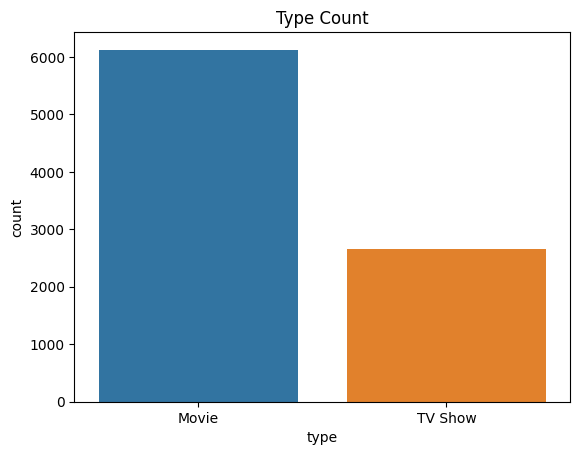

In [6]:
# Bar Graph
sns.countplot(x='type', data=data)
plt.title('Type Count')

### The number of TV shows and movies released each year

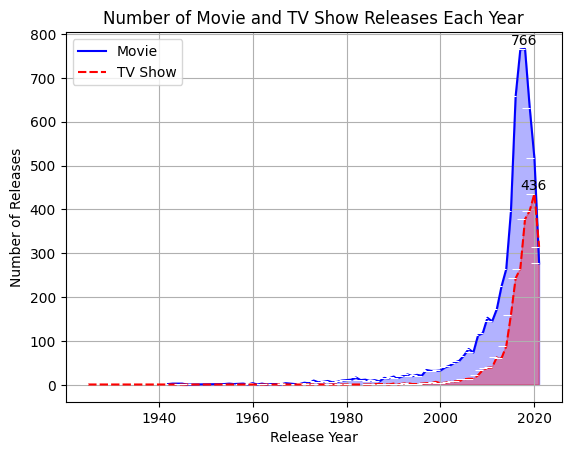

In [7]:
# filter the data for Movies
movies_data = data[data['type'] == 'Movie']
movie_counts_by_year = movies_data['release_year'].value_counts().sort_index()

# filter the data for TV Shows
tv_show_data = data[data['type'] == 'TV Show']
tv_show_counts_by_year = tv_show_data['release_year'].value_counts().sort_index()

trend_data = pd.DataFrame({
    'Movie': movie_counts_by_year,
    'TV Show': tv_show_counts_by_year
})

sns.lineplot(data=trend_data, marker=False, palette=['b', 'r'])

plt.fill_between(trend_data.index, trend_data['Movie'], color='blue', alpha=0.3)
plt.fill_between(trend_data.index, trend_data['TV Show'], color='red', alpha=0.3)

for col in trend_data.columns:
    max_value = trend_data[col].max()
    max_index = trend_data[col].idxmax()
    if max_value > 0:
        plt.annotate(str(int(max_value)), xy=(max_index, max_value), xytext=(-10, 3), textcoords='offset points')

plt.xlabel('Release Year')
plt.ylabel('Number of Releases')
plt.title('Number of Movie and TV Show Releases Each Year')
plt.grid(True)
plt.legend()
plt.show()

In [8]:
# find the year with the most Movie releases
most_movie_releases_year = movie_counts_by_year.idxmax()
most_movie_releases_count = movie_counts_by_year.max()

# find the year with the most TV Show releases
most_tv_show_releases_year = tv_show_counts_by_year.idxmax()
most_tv_show_releases_count = tv_show_counts_by_year.max()

print("Year with the most Movie releases:", most_movie_releases_year, "\nNumber of releases:", most_movie_releases_count)
print("\nYear with the most TV Show releases:", most_tv_show_releases_year, "\nNumber of releases:", most_tv_show_releases_count)

Year with the most Movie releases: 2018 
Number of releases: 766

Year with the most TV Show releases: 2020 
Number of releases: 436


### Top 5 Countries by Release Year

In [9]:
# remove rows where the country is "Not Given"
data = data[data['country'] != 'Not Given']

top_five_countries = data.groupby('country').count()['release_year'].sort_values(ascending=False).head(5)
top_five_countries

country
United States     3240
India             1056
United Kingdom     638
Pakistan           420
Canada             271
Name: release_year, dtype: int64

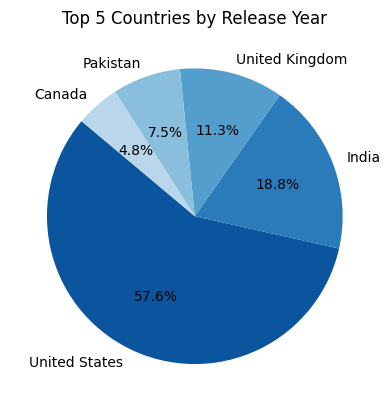

In [10]:
top_five_countries = data.groupby('country').count()['release_year'].sort_values(ascending=False).head(5)

colors = sns.color_palette('Blues_r')

plt.pie(top_five_countries, 
        labels=top_five_countries.index, 
        autopct='%1.1f%%', 
        startangle=140, 
        colors=colors)
plt.title('Top 5 Countries by Release Year')
plt.show()

### Director

In [11]:
# view all the directors
data['director'].unique()

array(['Kirsten Johnson', 'Julien Leclercq', 'Mike Flanagan', ...,
       'Majid Al Ansari', 'Peter Hewitt', 'Mozez Singh'], dtype=object)

In [12]:
# remove rows where the director is "Not Given"
data = data[data['director'] != 'Not Given']

In [13]:
top_ten_directors = data['director'].value_counts().head(10)
top_ten_directors

Rajiv Chilaka             20
Alastair Fothergill       18
Raúl Campos, Jan Suter    18
Marcus Raboy              16
Suhas Kadav               16
Jay Karas                 14
Cathy Garcia-Molina       13
Jay Chapman               12
Youssef Chahine           12
Martin Scorsese           12
Name: director, dtype: int64

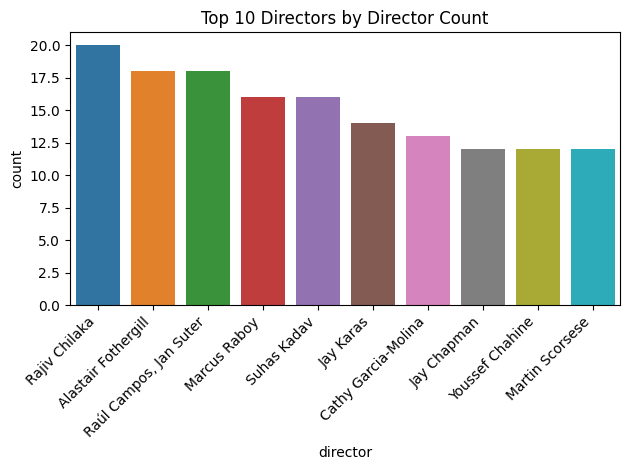

In [14]:
# plot a count chart of directors
sns.countplot(x='director', data=data, order=data['director'].value_counts().head(10).index)
plt.xticks(rotation=45, ha='right')
plt.title('Top 10 Directors by Director Count')
plt.tight_layout()
plt.show()

###### Conclusion
- The total count of Movies is higher than that of TV Shows.
- Prior to the year 2020, there was a positive growth in the number of Movie and TV Show releases.
- Moreover, the year 2017 saw the highest number of Movie releases, with 766 releases, while the year 2020 had the highest number of TV Show releases, with 436 releases.
- The top five countries with the highest number of releases are United States (57.6%), India (18.8%), United Kingdom (11.3%), Pakistan (7.5%), and Canada (4.8%).
- The director with the most published works is Rajiv Chilaka, with 20 productions.